- [**Загрузка и знакомство с данными**](#1)
- [**Cuisine Style**](#2)
- [**Reviews**](#3)
- [**Price Range**](#4)
- [**City**](#5)
- [**Number of Reviews**](#6)

<a name="1"></a>
# Загрузка

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import re

In [2]:
df = pd.read_csv('../files/project_3/main_task_new.csv')

In [3]:
def random_forest_regressor(df):
    df = df.drop(['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)
    df = df.fillna(0)

    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
    y = df['Rating']

    # Загружаем специальный инструмент для разбивки:
    from sklearn.model_selection import train_test_split

    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Импортируем необходимые библиотеки:
    from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
    from sklearn import metrics # инструменты для оценки точности модели

    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)

    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [4]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
## Создадим функцию для получения выбросов
def outliers_iqr(df, column):
    q_1 = df[column].quantile(0.25)
    q_3 = df[column].quantile(0.75)

    iqr = q_3 - q_1

    upper_bound = q_3 + (iqr * 1.5)
    lower_bound = q_1 - (iqr * 1.5)

    return {
        'lower': df[df[column] < lower_bound],
        'upper': df[df[column] > upper_bound]
    }

In [7]:
## random_forest_regressor(df) == MAE: 0.42

<a name="1.1"></a>
## Rating

In [8]:
## средний рейтинг
df.Rating.mean()

3.9930375

<AxesSubplot:>

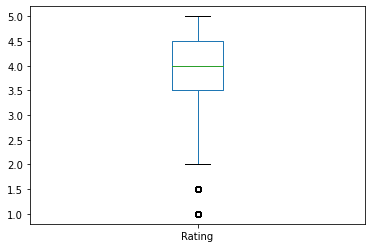

In [9]:
## Ниже 2-х баллов - выбросы
df.Rating.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

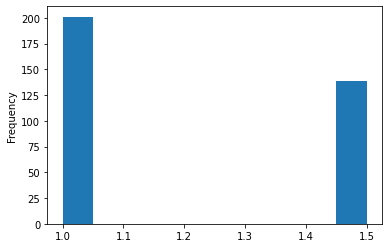

In [10]:
## Всего 340 ресторанов обладает рейтингом ниже 2 баллов
df[df.Rating < 2]['Rating'].plot(kind='hist')

<a name="2"></a>
## Cuisine Style

1. Соберем слайс уникальных кухонь - cuisines

In [11]:
def cuisines_to_list(x):
    return [y for y in x[1:-1].split("'") if (y != '') & (y != ', ')]

df['cuisine_style_updated'] = df['Cuisine Style'].fillna('').apply(cuisines_to_list)

In [12]:
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
def put_cuisine(cell):
    for item in cell:
        cuisines.add(item)
    return cell

df['cuisine_style_updated'].apply(put_cuisine)
print("Cuisine-len::", len(cuisines), "\nCuisine::", cuisines)

Cuisine-len:: 125 
Cuisine:: {'Spanish', 'Scottish', 'Moroccan', 'Bar', 'International', 'Czech', 'Persian', 'Romanian', 'European', 'Indonesian', 'Singaporean', 'Dutch', 'Turkish', 'Norwegian', 'Vegetarian Friendly', 'Israeli', 'Korean', 'Hungarian', 'Argentinean', 'Malaysian', 'French', 'Xinjiang', 'Caucasian', 'Delicatessen', 'Taiwanese', 'Salvadoran', 'Peruvian', 'Croatian', 'Thai', 'Sri Lankan', 'Fusion', 'Afghani', 'Jamaican', 'Danish', 'Steakhouse', 'Latvian', 'Indian', 'Sushi', 'Gluten Free Options', 'Austrian', 'Portuguese', 'Italian', 'Tunisian', 'Minority Chinese', 'Welsh', 'Yunnan', 'Venezuelan', 'Central American', 'Polish', 'British', 'Polynesian', 'South American', 'Greek', 'Australian', 'Diner', 'Pub', 'Mongolian', 'Street Food', 'Cuban', 'Filipino', 'Chilean', 'Ecuadorean', 'New Zealand', 'Arabic', 'Swiss', 'Healthy', 'Armenian', 'Mediterranean', 'Lebanese', 'Chinese', 'Gastropub', 'Albanian', 'Hawaiian', 'Pakistani', 'Soups', 'Native American', 'Latin', 'Japanese', 'F

2. Для каждой кухни в датафрейме создадим свой столбец. Заполним его 0 - если данная кухня не представлена в ресторане и 1 - если представлена

In [13]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

for item in cuisines:
    df[item] = df['cuisine_style_updated'].apply(find_item)

3. В колонку с 'cuisine_style_updated' положим количество кухонь, представленное в данной строке датафрейма. Если в данных отсутствует информация о типах кухонь, то считаем, что в этом ресторане предлагается только один тип кухни

In [14]:
def get_cuisines_len(x):
    if len(x) > 0:
        return len(x)
    return 1

df['cuisine_style_updated'] = df['cuisine_style_updated'].apply(get_cuisines_len)

In [15]:
## выберем только столбцы с кухнями
df_cuisines = df.drop([x for x in df.columns if not(x in cuisines)], axis=1)


## создадим новый датафрейм (кухня, сколько раз упоминается)
df_cuisines_count = pd.DataFrame({
    "cuisine": df_cuisines.columns,
    "cuisine_count": df_cuisines.apply(sum)
})
print(df_cuisines_count.sort_values(by="cuisine_count", ascending=False))
print("В среднем каждая кухня упоминается::", df_cuisines_count['cuisine_count'].mean())
print("1 quant::", df_cuisines_count['cuisine_count'].quantile(0.25))

                                 cuisine  cuisine_count
Vegetarian Friendly  Vegetarian Friendly          11189
European                        European          10060
Mediterranean              Mediterranean           6277
Italian                          Italian           5964
Vegan Options              Vegan Options           4486
...                                  ...            ...
Yunnan                            Yunnan              1
Burmese                          Burmese              1
Latvian                          Latvian              1
Salvadoran                    Salvadoran              1
Xinjiang                        Xinjiang              1

[125 rows x 2 columns]
В среднем каждая кухня упоминается:: 764.904
1 quant:: 21.0


cuisine          31
cuisine_count    31
dtype: int64

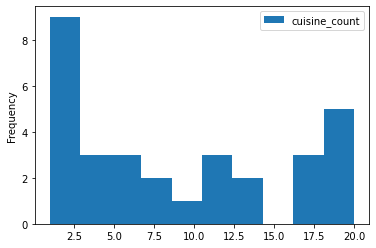

In [16]:
## Посмотрим, какое количество кухонь упоминается реже 21 раза
rare_cuisine = df_cuisines_count[df_cuisines_count['cuisine_count'] < 21]
df_cuisines_count[df_cuisines_count['cuisine_count'] < 21].plot(kind="hist")
df_cuisines_count[df_cuisines_count.cuisine_count < 21].count()

In [17]:
## Введем новый признак в датафрейм - наличие редкой кухни
def set_rare_cuisine(row):
    items = rare_cuisine.index
    for item in items:
        if row[item] > 0:
            return 1
            break
    return 0


df['rare_cuisine'] = df.apply(lambda row: set_rare_cuisine(row), axis=1)

In [18]:
## И удалим столбцы с редко упоминающимися видами кухонь
df = df.drop(rare_cuisine.index, axis = 1)

In [19]:
## random_forest_regressor(df) == MAE: 0.37

<a name="3"></a>
## Reviews

1. Создадим колонку Reviews_datetime:
    - оставим только массив datetime
    - если в этом массиве количество элементов != 2 -> вернем None

In [20]:
def get_time_list(cell):
    pattern = re.compile('\d+[/]\d+[/]\d+')
    match = re.findall(pattern, cell)
    ## Если количество отзывов не равно 2 - заменим на NaN
    if len(match) != 2:
        return None

    return [pd.to_datetime(y) for y in match]

df['Reviews_datetime'] = df.Reviews.apply(get_time_list)

2. Создадим колонку "last_review_ts" - возраст самого свежего отзыва в timestamp

In [21]:
def get_max_fresh_review(cell):
    if cell == None:
        return None
    max_fresh_review = cell[0]
    if cell[1] > max_fresh_review:
        max_fresh_review = cell[1]

    return max_fresh_review.timestamp()

df['last_review_ts'] = df.Reviews_datetime.apply(get_max_fresh_review)
df['last_review_ts'] = df['last_review_ts'].fillna(df['last_review_ts'].mean())

3. Создадим колонку с разницей между отзывами -  "diff_reviews_ts" - unix

In [22]:
def get_diff_reviews_time(cell):
    if cell == None:
        return None

    diff = cell[1].timestamp() - cell[0].timestamp()
    if diff < 0:
        diff = -diff
    return int(diff)

df['diff_reviews_ts'] = pd.to_numeric(df.Reviews_datetime.apply(get_diff_reviews_time))
df['diff_reviews_ts'] = df['diff_reviews_ts'].fillna(df['diff_reviews_ts'].mean())

In [23]:
## Какое максимальное количество дней отделяет даты публикации отзывов,
## размещённых на сайте ресторана? Введите количество дней в виде целого числа
df['diff_reviews_ts'].max() / 60 / 60 / 24

3207.0

In [24]:
df = df.drop('Reviews_datetime', axis=1)

In [25]:
## random_forest_regressor(df) == MAE: 0.35

Посмотрим, какие слова встречаются чаще всего в отзывах (Код для вывода закоментирован).

In [26]:
word_frequency = {}


## возвращаем массив слов из строки
def get_alpha(string):
    s = string.split(' ')
    new_string = list()
    for word in s:
        substitutions = ['[', '.', ',', ']', "'", '!']
        t = word.lower()
        for search in substitutions:
            t = t.replace(search, '')
        if t.isalpha() == False:
                continue
        elif len(t) < 4:
                continue
        new_string.append(t)
    return new_string


def set_word_frequency(df):
    for row in df:
        for i in get_alpha(row):
            if i not in word_frequency:
                word_frequency[i] = 1
            else:
                word_frequency[i] += 1


## set_word_frequency(df[df.Rating == 5]['Reviews'])
## set_word_frequency(df[df.Rating == 4]['Reviews'])
## set_word_frequency(df[df.Rating == 3]['Reviews'])
## set_word_frequency(df[df.Rating == 2]['Reviews'])
## set_word_frequency(df[df.Rating <= 3]['Reviews'])


word_frequency_sorted = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))
## for key, value in word_frequency_sorted.items():
##    print(key, value)


После просмотра для разных рейтингов, выясняется, что чаще:
- для низкого рейтинга: `['terrible', 'horrible', 'worst', 'poor', 'slow', 'rude', 'awful']`
- для высокого: `[
    'delicious', 'authentic', 'wonderful', 'favourite',
    'favorite', 'interesting', 'traditional', 'perfect',
    'amazing', 'good', 'nice', 'great', 'friendly', 'best',
    'excellent', 'atmosphere', 'tasty', 'unique', 'serviceamazing',
    'awesome', 'relaxing']`

4. Создадим колонки 'reviews_good_count' && 'reviews_bad_count' - сколько раз в отзывах встречаются плохие или хорошие слова

In [27]:
bad_words = ['terrible', 'horrible', 'worst', 'poor', 'slow', 'rude', 'awful']

def set_bad_words_count(cell):
    count = 0
    for word in get_alpha(cell):
        if word in bad_words:
            count += 1
    return count


df['bad_words_count'] = df.Reviews.apply(set_bad_words_count)

In [28]:
good_words = [
    'delicious', 'authentic', 'wonderful', 'favourite',
    'favorite', 'interesting', 'traditional', 'perfect',
    'amazing', 'good', 'nice', 'great', 'friendly', 'best',
    'excellent', 'atmosphere', 'tasty', 'unique', 'serviceamazing',
    'awesome', 'relaxing']

def set_good_words_count(cell):
    count = 0
    for word in get_alpha(cell):
        if word in good_words:
            count += 1
    return count


df['good_words_count'] = df.Reviews.apply(set_good_words_count)

<a name="4"></a>
## Price Range

Посмотрим количество уникальных значений и распределение признака:

In [29]:
price_range = df['Price Range']
print("Уникальные значения::", price_range.unique())
print("Распределение::\n", price_range.value_counts())
print("Количество пустых значений::", len(df[price_range.isna()]))

Уникальные значения:: ['$$ - $$$' nan '$$$$' '$']
Распределение::
 $$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64
Количество пустых значений:: 13886


Превратим этот признак в числовой:
- 0 - самый низкий уровень цен == `$`
- 1 - средний уровень цен == `$$-$$$`
- 2 - самый высокий уровень цен == `$$$$`
- пустые значения превратим в 1 - как самый встречающийся признак

In [30]:
import math
price_range_dist = {
    '$': 0,
    '$$ - $$$': 1,
    '$$$$': 2
}

df['price_range_updated'] = df['Price Range'].apply(lambda x: 1 if pd.isnull(x) else price_range_dist[x])

In [31]:
## random_forest_regressor(df) == MAE: 0.34

<a name="5"></a>
## City

In [32]:
## количество уникальных значений
len(df.City.unique())

31

In [33]:
df.City.value_counts()[:10]

London       5757
Paris        4897
Madrid       3108
Barcelona    2734
Berlin       2155
Milan        2133
Rome         2078
Prague       1443
Lisbon       1300
Vienna       1166
Name: City, dtype: int64

Добавим новый признак - наличие местной кухни в ресторане.

Создадим словарь:
`city - название национальной кухни.`

In [34]:
countries_dist = {
    'London': 'British',
    'Paris': 'French',
    'Madrid': 'Spanish',
    'Barcelona': 'Spanish',
    'Berlin': 'German',
    'Milan': 'Italian',
    'Rome': 'Italian',
    'Prague': 'Czech',
    'Lisbon': 'Portuguese',
    'Vienna': 'Austrian',
    'Amsterdam': 'Dutch',
    'Brussels': 'Belgian',
    'Hamburg': 'German',
    'Munich': 'German',
    'Lyon': 'French',
    'Stockholm': 'Swedish',
    'Budapest': 'Hungarian',
    'Warsaw': 'Polish',
    'Dublin': 'Irish',
    'Copenhagen': 'Danish',
    'Athens': 'Greek',
    'Edinburgh': 'Scottish',
    'Zurich': 'Swiss',
    'Oporto': 'Portuguese',
    'Geneva': 'Swiss',
    'Krakow': 'Polish',
    'Oslo': 'Norwegian',
    'Helsinki': 'European',
    'Bratislava': 'Slovenian',
    'Luxembourg': 'European',
    'Ljubljana': 'Slovenian'
}


def set_local_kitchen(row):
    return row[countries_dist[row.City]]

df['local_kitchen'] = df.apply(lambda row: set_local_kitchen(row), axis=1)

In [35]:
# Добавляем категорийный признак для городов ресторанов

df['city'] = df['City']
df = pd.get_dummies(df, columns=['City'], dummy_na=True)
df = df.rename(columns = {'city': 'City'})

<a name="6"></a>
## Number of Reviews

In [36]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(0)

In [38]:
random_forest_regressor(df)

MAE: 0.208644
